In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Chargement des données
df = pd.read_csv(r'D:\school\HETIC\PYTHON\Machine_learning\exo1\notes.csv')
print("Aperçu des données :")
print(df.head())

Aperçu des données :
    Eleve  Math  Physique  Chimie  Français  Histoire  Géographie  Anglais
0  Eleve1    16        15      17        11        10          12       14
1  Eleve2    12        13      11        15        14          15       15
2  Eleve3     9        10       8        14        15          13       12
3  Eleve4    18        19      17        17        16          18       18
4  Eleve5    14        13      15        10         9          10       13


In [11]:
# Affichage des premières lignes du DataFrame
print("Aperçu des données :")
print(df.head())

# Statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())



Aperçu des données :
    Eleve  Math  Physique  Chimie  Français  Histoire  Géographie  Anglais
0  Eleve1    16        15      17        11        10          12       14
1  Eleve2    12        13      11        15        14          15       15
2  Eleve3     9        10       8        14        15          13       12
3  Eleve4    18        19      17        17        16          18       18
4  Eleve5    14        13      15        10         9          10       13

Statistiques descriptives :
            Math   Physique     Chimie   Français   Histoire  Géographie  \
count  30.000000  30.000000  30.000000  30.000000  30.000000   30.000000   
mean   13.500000  13.600000  13.433333  13.433333  13.066667   13.633333   
std     3.037127   3.470069   2.860954   3.244978   3.372642    3.468910   
min     8.000000   7.000000   8.000000   7.000000   6.000000    7.000000   
25%    11.000000  10.250000  11.250000  11.000000  10.250000   11.250000   
50%    13.500000  13.500000  13.500000  14.0

In [12]:
# 2. Standardisation des données
# On exclut la colonne 'Eleve' qui n'est pas numérique
X = df.drop('Eleve', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nAperçu des données standardisées :")
print(X_scaled_df.head())



Aperçu des données standardisées :
       Math  Physique    Chimie  Français  Histoire  Géographie   Anglais
0  0.837218  0.410347  1.267983 -0.762696 -0.924822   -0.478899  0.060171
1 -0.502331 -0.175863 -0.865072  0.491051  0.281467    0.400711  0.421198
2 -1.506993 -1.055179 -1.931600  0.177614  0.583040   -0.185695 -0.661882
3  1.506993  1.582768  1.267983  1.117924  0.884612    1.280320  1.504278
4  0.167444 -0.175863  0.556964 -1.076133 -1.226394   -1.065305 -0.300856


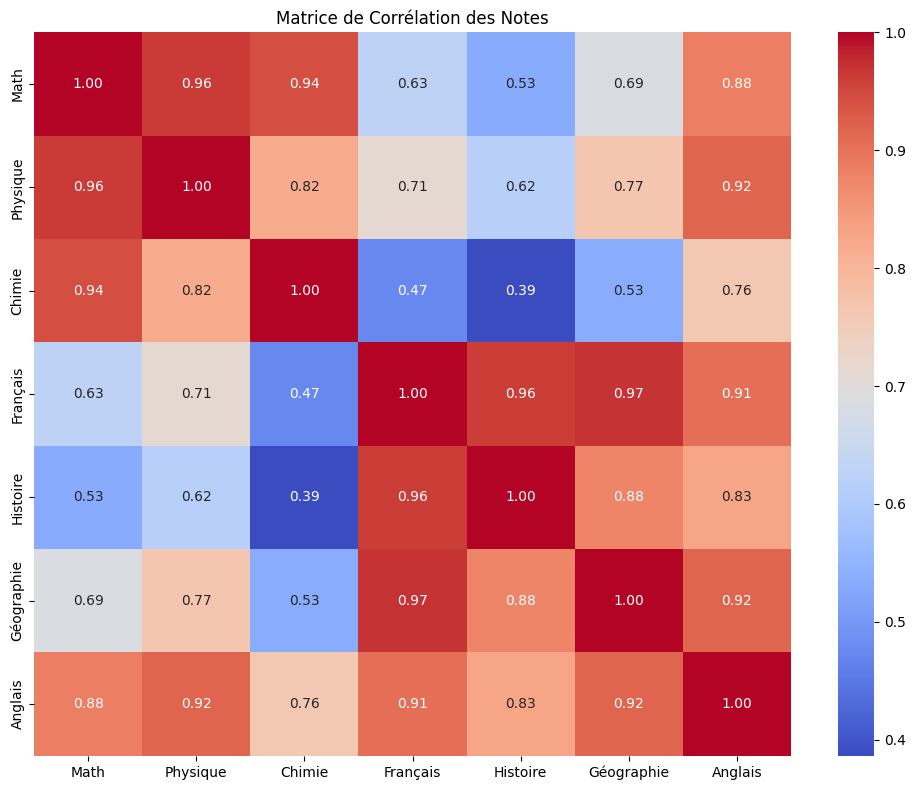


Matrice de corrélation :
                Math  Physique    Chimie  Français  Histoire  Géographie  \
Math        1.000000  0.961941  0.942523  0.628046  0.531895    0.685694   
Physique    0.961941  1.000000  0.816940  0.714135  0.615211    0.766579   
Chimie      0.942523  0.816940  1.000000  0.473081  0.386439    0.534269   
Français    0.628046  0.714135  0.473081  1.000000  0.961412    0.970368   
Histoire    0.531895  0.615211  0.386439  0.961412  1.000000    0.877539   
Géographie  0.685694  0.766579  0.534269  0.970368  0.877539    1.000000   
Anglais     0.884609  0.917096  0.762246  0.905901  0.828665    0.917991   

             Anglais  
Math        0.884609  
Physique    0.917096  
Chimie      0.762246  
Français    0.905901  
Histoire    0.828665  
Géographie  0.917991  
Anglais     1.000000  


In [13]:
# 3. Calcul et affichage de la matrice de corrélation
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation des Notes')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

print("\nMatrice de corrélation :")
print(correlation_matrix)


In [ ]:
# 4. Application de la PCA
pca = PCA(n_components=7)  # 7 = nombre total de matières
principal_components = pca.fit_transform(X_scaled)

In [ ]:
# 5. Analyse de la variance expliquée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


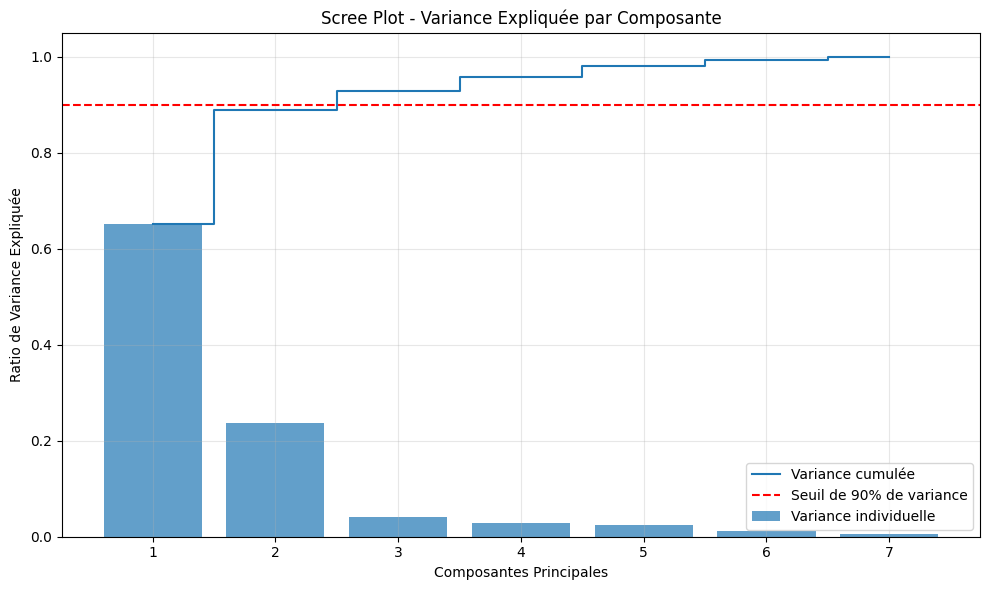


Variance expliquée par chaque composante :
Composante 1: 0.6515 (0.6515 cumulée)
Composante 2: 0.2375 (0.8889 cumulée)
Composante 3: 0.0409 (0.9298 cumulée)
Composante 4: 0.0278 (0.9575 cumulée)
Composante 5: 0.0237 (0.9812 cumulée)
Composante 6: 0.0129 (0.9941 cumulée)
Composante 7: 0.0059 (1.0000 cumulée)


In [14]:
# Création du scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Variance individuelle')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Variance cumulée')
plt.axhline(y=0.9, color='r', linestyle='--', label='Seuil de 90% de variance')
plt.xlabel('Composantes Principales')
plt.ylabel('Ratio de Variance Expliquée')
plt.title('Scree Plot - Variance Expliquée par Composante')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('scree_plot.png')
plt.show()

print("\nVariance expliquée par chaque composante :")
for i, var in enumerate(explained_variance):
    print(f"Composante {i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulée)")


Contribution des variables aux composantes principales :
                 PC1       PC2       PC3       PC4       PC5       PC6  \
Math        0.373294  0.409131 -0.198384 -0.003479 -0.463994  0.660264   
Physique    0.382713  0.352704 -0.153857 -0.473205  0.665353 -0.000696   
Chimie      0.354608  0.452918 -0.174615  0.441954 -0.111676 -0.625321   
Français    0.380464 -0.424303 -0.076427 -0.269884  0.025027 -0.019215   
Histoire    0.366729 -0.424111 -0.328215 -0.249903 -0.396458 -0.281865   
Géographie  0.375126 -0.377555 -0.054651  0.663683  0.393363  0.298733   
Anglais     0.410455  0.025041  0.888779 -0.070548 -0.130396 -0.062971   

                 PC7  
Math        0.051533  
Physique   -0.197081  
Chimie      0.199517  
Français    0.771712  
Histoire   -0.528049  
Géographie -0.171157  
Anglais    -0.122582  


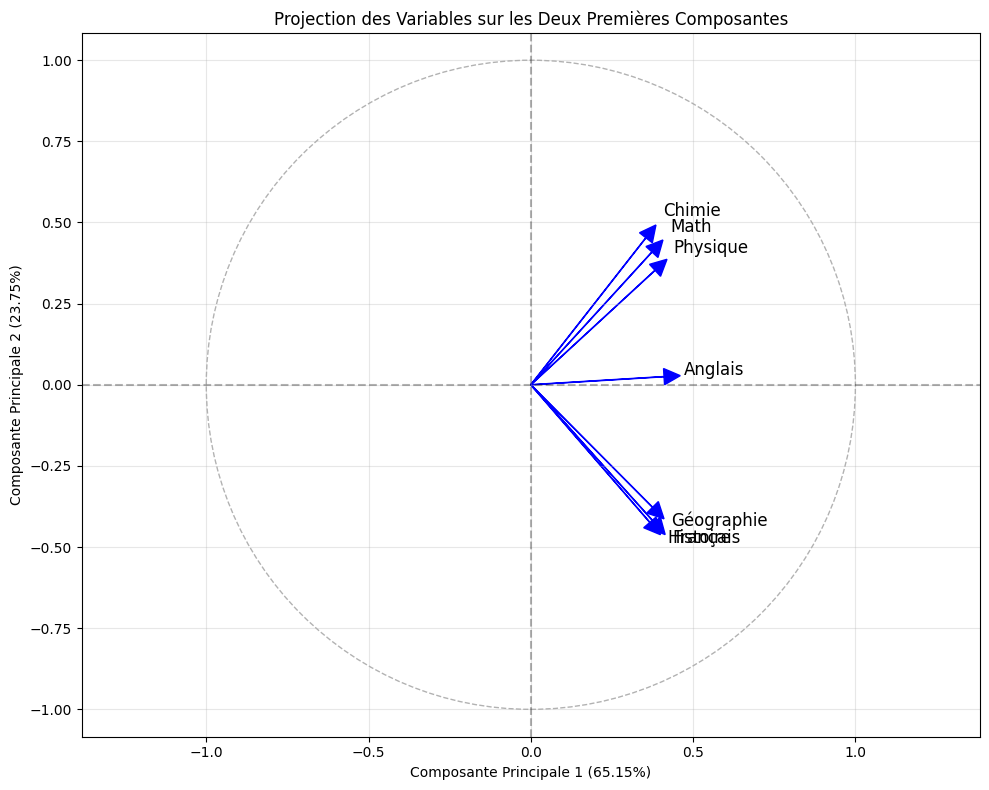

In [15]:
# 6. Interprétation des composantes
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=X.columns)

print("\nContribution des variables aux composantes principales :")
print(loadings_df)

# Visualisation des loadings pour les deux premières composantes
plt.figure(figsize=(10, 8))
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, loadings[0, i], loadings[1, i], head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    plt.text(loadings[0, i]*1.15, loadings[1, i]*1.15, feature, fontsize=12)

plt.xlabel(f'Composante Principale 1 ({explained_variance[0]:.2%})')
plt.ylabel(f'Composante Principale 2 ({explained_variance[1]:.2%})')
plt.title('Projection des Variables sur les Deux Premières Composantes')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
circle = plt.Circle((0, 0), 1, fill=False, linestyle='--', alpha=0.3)
plt.gca().add_patch(circle)
plt.axis('equal')
plt.tight_layout()
plt.savefig('loadings_plot.png')
plt.show()

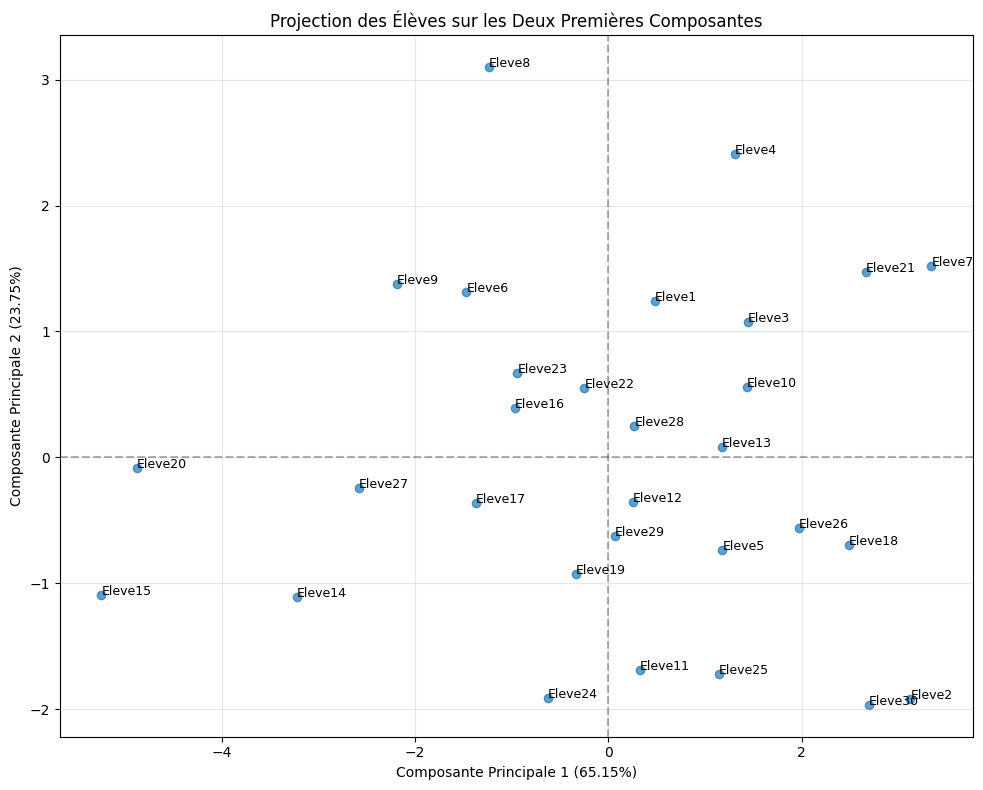

In [16]:
# 7. Bonus: Scatter plot des élèves dans l'espace des deux premières composantes
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
plt.xlabel(f'Composante Principale 1 ({explained_variance[0]:.2%})')
plt.ylabel(f'Composante Principale 2 ({explained_variance[1]:.2%})')
plt.title('Projection des Élèves sur les Deux Premières Composantes')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Ajout des numéros d'élèves
for i in range(len(principal_components)):
    plt.annotate(df['Eleve'][i], (principal_components[i, 0], principal_components[i, 1]), fontsize=9)

plt.tight_layout()
plt.savefig('students_scatter.png')
plt.show()

In [17]:
# Analyse des résultats
print("\n=== Interprétation des Résultats ===")
print("1. Nombre de composantes à retenir :")
threshold = 0.9
n_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"   Pour expliquer {threshold*100}% de la variance, il faut retenir {n_components} composantes.")

print("\n2. Interprétation des deux premières composantes :")
print("   Composante 1 (PC1) - Corrélations :")
for feature, loading in sorted(zip(X.columns, loadings[0]), key=lambda x: abs(x[1]), reverse=True):
    print(f"   - {feature}: {loading:.4f}")

print("\n   Composante 2 (PC2) - Corrélations :")
for feature, loading in sorted(zip(X.columns, loadings[1]), key=lambda x: abs(x[1]), reverse=True):
    print(f"   - {feature}: {loading:.4f}")

print("\n3. Conclusion :")
print("   Les résultats confirment l'existence de deux facteurs latents principaux :")
print("   - La première composante principale (PC1) représente probablement le facteur général d'aptitude académique")
print("   - La deuxième composante principale (PC2) semble distinguer les matières scientifiques des matières littéraires")


=== Interprétation des Résultats ===
1. Nombre de composantes à retenir :
   Pour expliquer 90.0% de la variance, il faut retenir 3 composantes.

2. Interprétation des deux premières composantes :
   Composante 1 (PC1) - Corrélations :
   - Anglais: 0.4105
   - Physique: 0.3827
   - Français: 0.3805
   - Géographie: 0.3751
   - Math: 0.3733
   - Histoire: 0.3667
   - Chimie: 0.3546

   Composante 2 (PC2) - Corrélations :
   - Chimie: 0.4529
   - Français: -0.4243
   - Histoire: -0.4241
   - Math: 0.4091
   - Géographie: -0.3776
   - Physique: 0.3527
   - Anglais: 0.0250

3. Conclusion :
   Les résultats confirment l'existence de deux facteurs latents principaux :
   - La première composante principale (PC1) représente probablement le facteur général d'aptitude académique
   - La deuxième composante principale (PC2) semble distinguer les matières scientifiques des matières littéraires
